<a href="https://colab.research.google.com/github/maryem-ahmed/Face-Mask-Detection-using-CNN/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 90% 147M/163M [00:00<00:00, 1.53GB/s]
100% 163M/163M [00:00<00:00, 1.48GB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('DONE')

DONE


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

In [ ]:
print("Number of with mask files",len(with_mask))
print("Number of without mask files",len(without_mask))

Number of with mask files 3725
Number of without mask files 3828


**Labeling** -
lets say that with mask takes label -> 1
and without mask takes -> 0

In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
labels = with_mask_labels + without_mask_labels

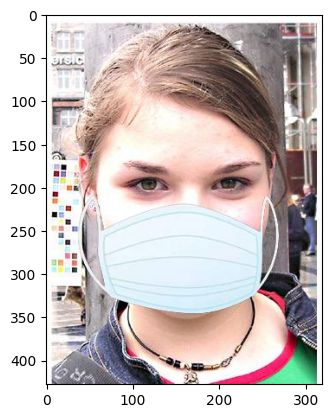

In [ ]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1555.jpg')
imgplot = plt.imshow(img)
plt.show()

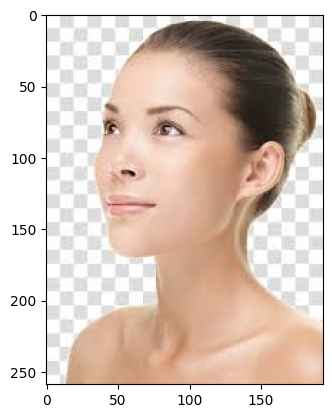

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

To continue image processing first we need to resize image , seconed convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'
data = []
for img_file in with_mask:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
for img_file in without_mask:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[47, 47, 45],
        [47, 47, 45],
        [47, 47, 43],
        ...,
        [71, 58, 52],
        [72, 59, 53],
        [72, 59, 53]],

       [[47, 47, 45],
        [47, 47, 45],
        [47, 46, 43],
        ...,
        [71, 58, 52],
        [71, 58, 52],
        [71, 58, 52]],

       [[46, 45, 43],
        [46, 45, 43],
        [47, 45, 42],
        ...,
        [70, 57, 51],
        [70, 57, 51],
        [70, 57, 51]],

       ...,

       [[42, 50, 52],
        [40, 48, 50],
        [36, 44, 46],
        ...,
        [58, 47, 58],
        [61, 53, 64],
        [63, 55, 66]],

       [[42, 48, 51],
        [40, 46, 49],
        [35, 42, 45],
        ...,
        [57, 50, 60],
        [57, 51, 63],
        [57, 52, 64]],

       [[44, 49, 53],
        [42, 47, 51],
        [38, 44, 47],
        ...,
        [57, 52, 62],
        [54, 50, 61],
        [51, 50, 61]]], dtype=uint8)
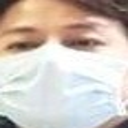

In [ ]:
data[0]

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
X_train_scaled= X_train/255
X_test_scaled = X_test/255

Building the CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile nn
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
#trainning the nueral netwwork
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)


Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - acc: 0.6793 - loss: 0.6334 - val_acc: 0.8760 - val_loss: 0.2695
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8772 - loss: 0.3232 - val_acc: 0.8876 - val_loss: 0.2436
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9061 - loss: 0.2445 - val_acc: 0.9041 - val_loss: 0.1800
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9107 - loss: 0.2238 - val_acc: 0.9041 - val_loss: 0.2023
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9206 - loss: 0.1867 - val_acc: 0.9355 - val_loss: 0.1652


Model Evaluation

In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9242 - loss: 0.1937
Loss:  0.19195401668548584
Accuracy:  0.9272005558013916


Adding a predictive system

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

KeyboardInterrupt: Interrupted by user